In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
reviewsDF = pd.DataFrame(pd.read_csv("airbnb_usa/Chicago/reviews_detailed.csv"))
reviewsDF['comments'] = reviewsDF['comments'].str.replace('<br/>', '', regex=True)

hostsDF = pd.DataFrame(pd.read_csv("airbnb_usa/Chicago/listings.csv"))
homeDetailsDF = pd.read_csv("airbnb_usa/Chicago/listings_detailed.csv", usecols = ["id", "accommodates", "bathrooms", "bathrooms_text", "bedrooms", "beds", "amenities"])

print(len(reviewsDF))
print(len(hostsDF))
print(len(homeDetailsDF))

355888
7747
7747


In [3]:
# Check for null values in the 2 DFs

reviewNullCounts = reviewsDF.isnull().sum()
hostsNullCounts = hostsDF.isnull().sum()
homeDetailsNullCounts = homeDetailsDF.isnull().sum()

print("Review:\n ", reviewNullCounts)
print("\n Hosts:\n ", hostsNullCounts)
print("\n Hosts:\n ", homeDetailsNullCounts)

Review:
  listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         94
dtype: int64

 Hosts:
  id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7747
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1493
reviews_per_month                 1493
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1174
dtype: int64

 Hosts:
  id                   0
accommodates         0
bathrooms         7747
bathrooms_text      14
bedrooms           583
beds 

In [4]:
# Merge 2 files to one dataframe

mergedDF = pd.merge(reviewsDF, hostsDF, left_on='listing_id', right_on='id', how="left")
mergedDF = pd.merge(mergedDF, homeDetailsDF, left_on='listing_id', right_on='id', how="left")
mergedDF.head(5)
# print(len(mergedDF))

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,host_id,host_name,...,availability_365,number_of_reviews_ltm,license,id,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,2384,Hyde Park - Walk to UChicago,2613,Rebecca,...,347,20,R17000015609,2384,1,NaN,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,2384,Hyde Park - Walk to UChicago,2613,Rebecca,...,347,20,R17000015609,2384,1,NaN,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
2,2384,30273263,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...,2384,Hyde Park - Walk to UChicago,2613,Rebecca,...,347,20,R17000015609,2384,1,NaN,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
3,2384,30974202,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...,2384,Hyde Park - Walk to UChicago,2613,Rebecca,...,347,20,R17000015609,2384,1,NaN,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
4,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\rI...,2384,Hyde Park - Walk to UChicago,2613,Rebecca,...,347,20,R17000015609,2384,1,NaN,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."


In [5]:
# check for null values in the merged dataframe

nullCounts = mergedDF.isnull().sum()

print("Null Data Count:\n", nullCounts)

Null Data Count:
 listing_id                             0
id_x                                   0
date                                   0
reviewer_id                            0
reviewer_name                          0
comments                              94
id_y                                   0
name                                   0
host_id                                0
host_name                              0
neighbourhood_group               355888
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                            0
reviews_per_month                      0
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                             381

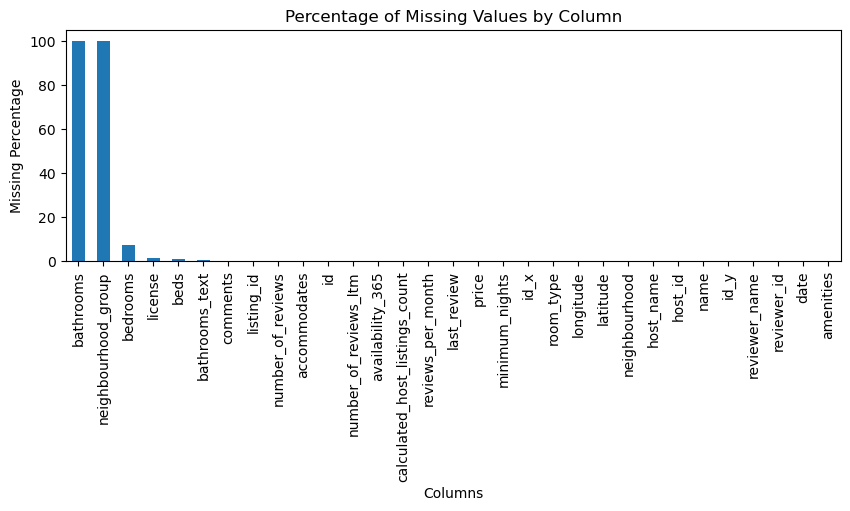

In [6]:
# Analysis by visualizing missing values

missing_percentage = (mergedDF.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [5]:
# Drop columns that are not required

# As we can see, there is 100% missing data in "bathrooms" and "neighbourhood_group" columns. We can safely drop these columns.
# Column "license" - we are not taking into consideration the reviews for hosts that do not have a license
# We are doing sentiment analysis of Airbnb reviews, so columns like "id_x", "id_y", "minimum_nights", "availability_365", "number_of_reviews_ltm" are not required

mergedDF.drop(['id_x', 'id_y', 'bathrooms', 'neighbourhood_group', 'minimum_nights', 'availability_365', 'number_of_reviews_ltm'],
              axis = 1, inplace = True)
len(mergedDF.columns)

# Export this file for future analysis
# mergedDF.to_csv("Airbnb_Dataset.csv", index=False)

24

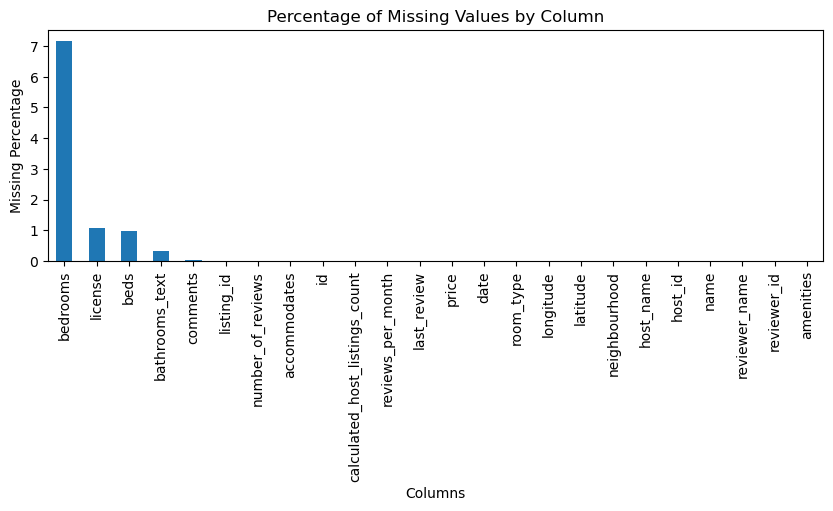

In [8]:
# Visualization after removing missing values
# print(mergedDF.columns)
missing_percentage = (mergedDF.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [9]:
mergedDF.head()

,listing_id,date,reviewer_id,reviewer_name,comments,name,host_id,host_name,neighbourhood,latitude,...,last_review,reviews_per_month,calculated_host_listings_count,license,id,accommodates,bathrooms_text,bedrooms,beds,amenities
0,2384,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.7879,...,2023-03-04,2.13,1,R17000015609,2384,1,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
1,2384,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.7879,...,2023-03-04,2.13,1,R17000015609,2384,1,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
2,2384,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.7879,...,2023-03-04,2.13,1,R17000015609,2384,1,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
3,2384,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.7879,...,2023-03-04,2.13,1,R17000015609,2384,1,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."
4,2384,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r\rI...,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.7879,...,2023-03-04,2.13,1,R17000015609,2384,1,1 shared bath,1.0,1.0,"[""Dedicated workspace"", ""Host greets you"", ""Ba..."


In [10]:
mergedDF.describe()

,listing_id,reviewer_id,host_id,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,id,accommodates,bedrooms,beds
count,3.558880e+05,3.558880e+05,3.558880e+05,355888.000000,355888.000000,355888.000000,355888.000000,355888.000000,355888.000000,3.558880e+05,355888.000000,330361.000000,352433.000000
mean,4.721138e+16,1.524017e+08,1.033163e+08,41.905080,-87.668818,165.866222,210.047830,3.839562,6.556782,4.721138e+16,4.413369,1.818072,2.310814
std,1.681805e+17,1.341962e+08,1.173199e+08,0.055029,0.039437,1360.266421,315.256104,5.885710,19.804439,1.681805e+17,2.841070,1.025586,1.623363
min,2.384000e+03,6.500000e+01,2.153000e+03,41.650640,-87.846720,0.000000,1.000000,0.010000,1.000000,2.384000e+03,0.000000,1.000000,1.000000
25%,1.415442e+07,3.991991e+07,1.602781e+07,41.882280,-87.691080,75.000000,68.000000,1.820000,1.000000,1.415442e+07,2.000000,1.000000,1.000000
50%,2.536476e+07,1.135641e+08,5.285543e+07,41.908740,-87.665780,107.000000,145.000000,2.860000,2.000000,2.536476e+07,4.000000,2.000000,2.000000
75%,4.099118e+07,2.355156e+08,1.548503e+08,41.941960,-87.643690,167.000000,256.000000,4.150000,6.000000,4.099118e+07,6.000000,2.000000,3.000000
max,8.457989e+17,5.055928e+08,5.040802e+08,42.022200,-87.529541,99998.000000,3091.000000,58.470000,658.000000,8.457989e+17,16.000000,12.000000,20.000000


In [11]:
mergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355888 entries, 0 to 355887
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      355888 non-null  int64  
 1   date                            355888 non-null  object 
 2   reviewer_id                     355888 non-null  int64  
 3   reviewer_name                   355888 non-null  object 
 4   comments                        355794 non-null  object 
 5   name                            355888 non-null  object 
 6   host_id                         355888 non-null  int64  
 7   host_name                       355888 non-null  object 
 8   neighbourhood                   355888 non-null  object 
 9   latitude                        355888 non-null  float64
 10  longitude                       355888 non-null  float64
 11  room_type                       355888 non-null  object 
 12  price           

In [12]:
print("Distinct values present in column ROOM_TYPE: \t", mergedDF["room_type"].unique())

Distinct values present in column ROOM_TYPE: 	 ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


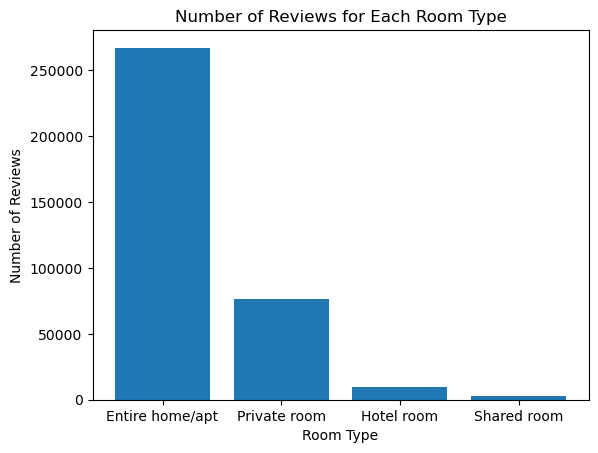

In [13]:
# Data Visualization based on Room Type

# X -> Distinct Room Types
# Y -> Number of Reviews

# Count the number of reviews for each room type
room_type_counts = mergedDF['room_type'].value_counts()

# Create a bar chart
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Room Type')
plt.show()

In [14]:
# Calculate the average number of comments for each host
host_avg_comments = round(mergedDF.groupby('host_id')['comments'].count().mean())

# Find the maximum number of comments
host_max_comments = mergedDF.groupby('host_id')['comments'].count().max()
    
# Find the host with the minimum number of comments
host_min_comments = mergedDF.groupby('host_id')['comments'].count().min()

# Display the results
print("Maximum number of comments:", host_max_comments)
print("Average number of comments:", host_avg_comments)
print("Minimum number of comments:", host_min_comments)

Maximum number of comments: 7534
Average number of comments: 112
Minimum number of comments: 1


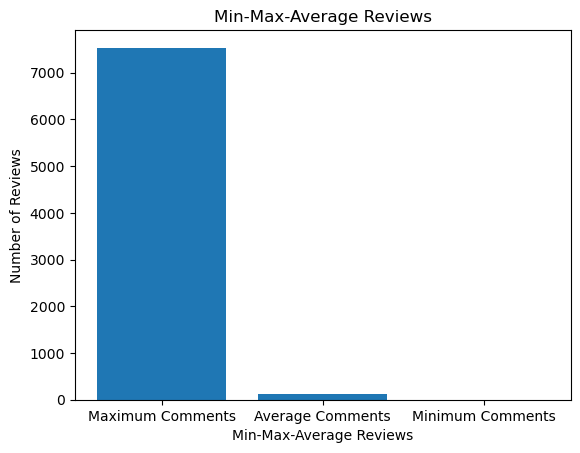

In [15]:
# Visualize Max, Min, Average reviews

# Create a bar chart
plt.bar(["Maximum Comments", "Average Comments", "Minimum Comments"], [host_max_comments, host_avg_comments, host_min_comments])
plt.xlabel('Min-Max-Average Reviews')
plt.ylabel('Number of Reviews')
plt.title('Min-Max-Average Reviews')
plt.show()

In [16]:
# Check if these maximum and minimum are outliers

mergedDF.groupby('host_id')['comments'].count()

# Calculate the number of comments for each host
commentsCountDF = pd.DataFrame(mergedDF.groupby('host_id')['comments'].count())

print(commentsCountDF[commentsCountDF['comments'] == 1].count())
print(commentsCountDF[commentsCountDF['comments'] > 112].count())
# hosts_with_one_comment = commentsCountDF[commentsCountDF['comments'] == 1].iloc[0].count()
# print(hosts_with_one_comment)
# hosts_with_one_comment = mergedDF[mergedDF['comments'].str.split().str.len() == 1]['host_id'].value_counts()

# # Display the results
# print("Number of hosts with just 1 comment:", hosts_with_one_comment)

comments    175
dtype: int64
comments    868
dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/priyanka/nltk_data...


True

Sentiment of text 1: {'neg': 0.095, 'neu': 0.71, 'pos': 0.196, 'compound': 0.4032}
Sentiment of text 2: {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9594}


0.0
0.3645238095238095


In [6]:
# Remove Special characters from comments

import re

def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # This pattern will keep alphanumeric characters and spaces
    
    # Replace special characters with an empty string    
    clean_text = re.sub(pattern, '', str(text))
    
    return clean_text


mergedDF['comments'] = remove_special_characters(mergedDF['comments'])

In [8]:
# Sentiment Analysis using VADER (Valence Aware Dictionary sEntiment Reasoner)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')

sentiment = SentimentIntensityAnalyzer()

# Function to get sentiment polarity of a text using VADER
def get_vader_sentiment(text):
    sentiment_scores = sentiment.polarity_scores(text)
    
    return sentiment_scores['compound']

mergedDF['sentiment_score'] = mergedDF['comments'].apply(get_vader_sentiment)

print(mergedDF.columns)

Index(['listing_id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count', 'license', 'id',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'sentiment_score'],
      dtype='object')


In [9]:
# Sentiment Analysis using Text Blob

from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'comments' column
text_1 = "Do not book anything"
text_2 =  "I stayed 10 days with Rebecca and had a most pleasant time. The apartment is part of a charming 100 year-old complex that surrounds a tranquil garden courtyard. Rebecca‚Äôs home is very comfortable and equipped with more conveniences than I needed. I found Rebecca a most generous host happy to fully share her apartment and to assist in any way possible. The apartment is part of the leafy suburb that surrounds the University of Chicago and benefits from both the constant security put in place for the students and the public transport that serves the campus. And last, but not least, Rebecca makes an excellent margarita."

print(get_sentiment(text_1))
print(get_sentiment(text_2))

0.0
0.3645238095238095
